In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.datasets import load_iris
import scipy.stats as st
import scipy.stats as stats

# visualize 2D PDF contour and marginal

import matplotlib.gridspec as gridspec
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [2]:
p = plt.rcParams
# p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

In [3]:
def plot_joint_marginal(xx1, xx2, surface, x1, f_x1, x2, f_x2, title_txt, color='#0070C0'):
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(2, 2,
                           width_ratios=[3, 1],
                           height_ratios=[3, 1])
    ax1 = plt.subplot(gs[0])
    
    ax1.contour(xx1, xx2, surface, 20, cmap='RdYlBu_r')
    
    ax1.yaxis.set_label_position('right')
    ax1.set_xticks(np.arange(0,1.2, 0.2))
    ax1.set_yticks(np.arange(0,1.2, 0.2))
    ax1.set_title(title_txt)
    
    ax2 = plt.subplot(gs[1])
    
    ax2.plot(f_x2, x2, color = color)
    
    ax2.fill_between(f_x2, x2, edgecolor = 'none', facecolor = color, alpha = 0.2)
    
    ax2.set_xlabel('PDF')
    ax2.set_ylim(0,1)
    ax2.set_xlim(0, 5)
    ax2.set_xticks(np.arange(6))
    ax2.set_yticks(np.arange(0,1.2, 0.2))
    ax2.invert_xaxis()
    ax2.yaxis.tick_right()
    
    ax3 = plt.subplot(gs[2])
    
    ax3.plot(x1, f_x1, color=color)
    
    ax3.fill_between(x1, f_x1, edgecolor = 'none', facecolor = color, alpha = 0.2)
    
    ax3.set_ylabel('PDF')
    ax3.yaxis.set_label_position('left')
    ax3.set_xlim(0,1)
    ax3.set_xticks(np.arange(0,1.2, 0.2))
    ax3.set_ylim(0, 5)
    ax3.set_yticks(np.arange(6))
    ax4 = plt.subplot(gs[3])
    ax4.set_visible(False)
    
    fig.savefig('Figures/' + title_txt + '.svg', format='svg')
    
    plt.show()

In [4]:
x1 = np.linspace(0,1,201)
x2 = np.linspace(0,1,201)

xx1, xx2 = np.meshgrid(x1, x2)

xx3 = 1.0 - xx1 - xx2
xx3 = np.where(xx3 > 0.0, xx3, np.nan)

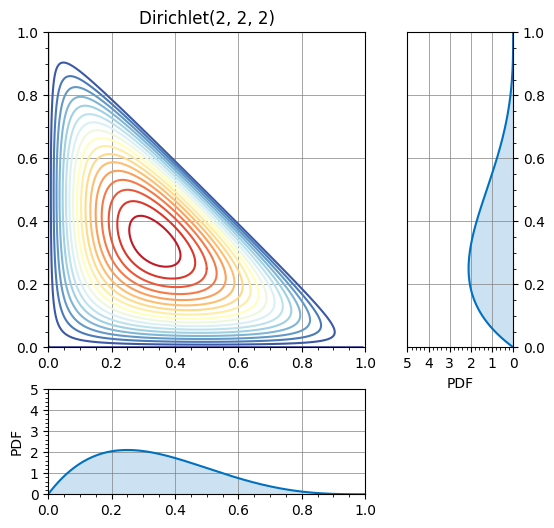

In [5]:
# Dirichlet alphas
alpha_1 = 2
alpha_2 = 2
alpha_3 = 2

alpha_0 = alpha_1 + alpha_2 + alpha_3

alphas = np.array([alpha_1, alpha_2, alpha_3])
rv = stats.dirichlet(alphas)

PDF_ff = rv.pdf(np.array(([xx1.ravel(), xx2.ravel(), xx3.ravel()])))

PDF_ff = np.reshape(PDF_ff, xx1.shape)

beta_dist = stats.beta

theta_array = np.linspace(0, 1, 500)

beta_1 = alpha_0 - alpha_1
f_x1 = beta_dist.pdf(x1, alpha_1, beta_1)

beta_2 = alpha_0 - alpha_2
f_x2 = beta_dist.pdf(x2, alpha_2, beta_2)

title_txt = 'Dirichlet(%0.0f, %0.0f, %0.0f)'%(alpha_1,alpha_2,alpha_3)
plot_joint_marginal(xx1, xx2, PDF_ff, x1, f_x1, x2, f_x2, title_txt)

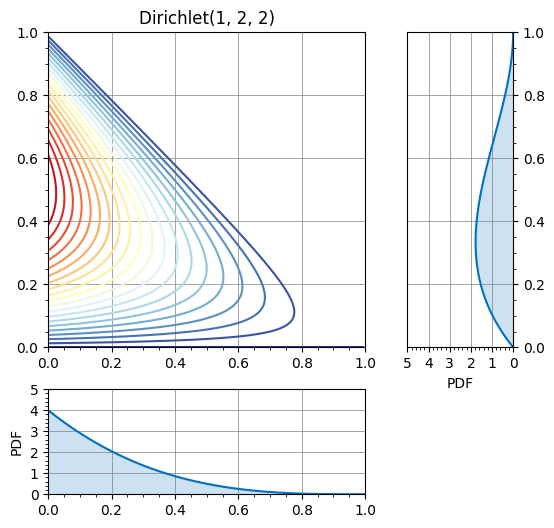

In [6]:
# Dirichlet alphas
alpha_1 = 1
alpha_2 = 2
alpha_3 = 2

alpha_0 = alpha_1 + alpha_2 + alpha_3

alphas = np.array([alpha_1, alpha_2, alpha_3])
rv = stats.dirichlet(alphas)

PDF_ff = rv.pdf(np.array(([xx1.ravel(), xx2.ravel(), xx3.ravel()])))

PDF_ff = np.reshape(PDF_ff, xx1.shape)

beta_dist = stats.beta

theta_array = np.linspace(0, 1, 500)

beta_1 = alpha_0 - alpha_1
f_x1 = beta_dist.pdf(x1, alpha_1, beta_1)

beta_2 = alpha_0 - alpha_2
f_x2 = beta_dist.pdf(x2, alpha_2, beta_2)

title_txt = 'Dirichlet(%0.0f, %0.0f, %0.0f)'%(alpha_1,alpha_2,alpha_3)
plot_joint_marginal(xx1, xx2, PDF_ff, x1, f_x1, x2, f_x2, title_txt)